### A2: Analysis of NASA - Kepler Star KIC7671081B Light Curve Waves


In [1]:
import librosa
import numpy as np
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

audio_data = "./2_KSKIC7671081B.mp3"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)
librosa.load(audio_data, sr=44100)

<class 'numpy.ndarray'> <class 'int'>
(454054,) 22050


(array([ 1.5868711e-09,  6.4384622e-09, -6.2616473e-10, ...,
         4.0395800e-03,  3.1455609e-03,  0.0000000e+00], dtype=float32),
 44100)

In [2]:
import IPython.display as ipd
ipd.Audio(audio_data)

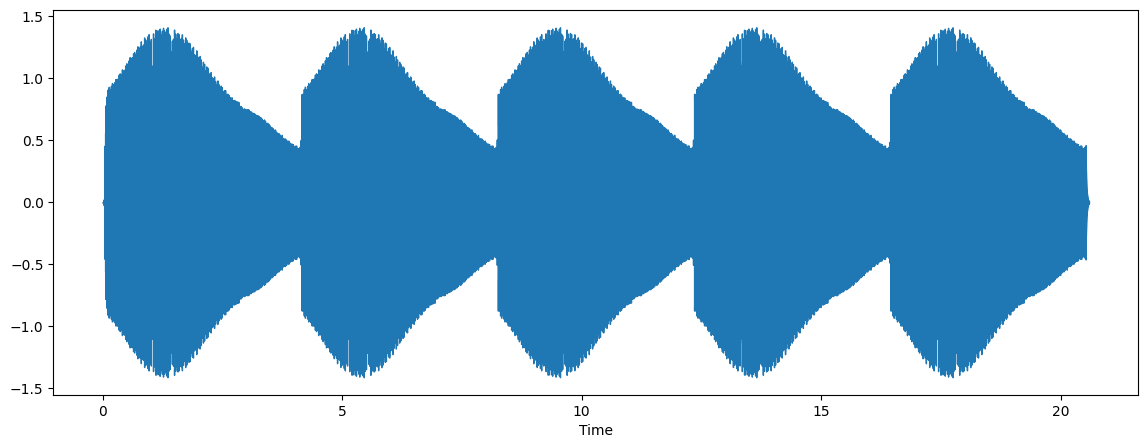

In [3]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [4]:
# Build a simple chroma filter bank
chromafb = librosa.filters.chroma(sr=22050, n_fft=4096)
# Use quarter-tones instead of semitones
librosa.filters.chroma(sr=22050, n_fft=4096, n_chroma=24)
# Equally weight all octaves
librosa.filters.chroma(sr=22050, n_fft=4096, octwidth=None)

array([[3.06632757e-01, 2.43654341e-01, 1.60742402e-01, ...,
        2.75466492e-20, 2.33491276e-20, 1.97881458e-20],
       [3.00136745e-01, 2.74304509e-01, 2.27255851e-01, ...,
        6.61833761e-13, 5.80291837e-13, 5.08708906e-13],
       [2.90173739e-01, 3.00350249e-01, 2.96240419e-01, ...,
        2.91240070e-07, 2.64146166e-07, 2.39527623e-07],
       ...,
       [3.03631455e-01, 2.60380656e-01, 1.95162937e-01, ...,
        2.12708409e-16, 2.44482217e-16, 2.80916862e-16],
       [3.08412760e-01, 2.28293657e-01, 1.32887244e-01, ...,
        1.18539604e-24, 1.40935927e-24, 1.67509979e-24],
       [3.09425622e-01, 2.10499778e-01, 1.04831174e-01, ...,
        2.09995848e-29, 1.72074678e-29, 1.40981758e-29]], dtype=float32)

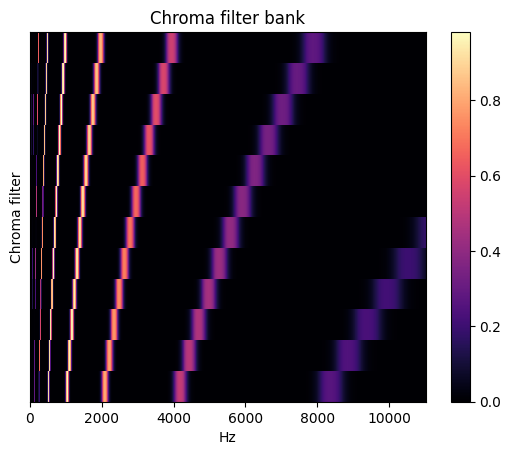

In [5]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chromafb, x_axis='linear', ax=ax)
ax.set(ylabel='Chroma filter', title='Chroma filter bank')
fig.colorbar(img, ax=ax)

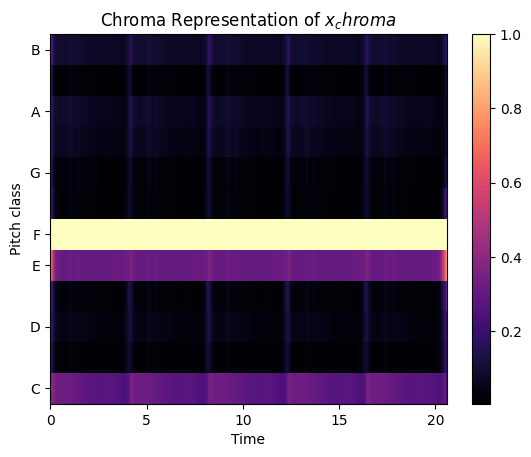

In [6]:
hop_length = 1024

x_chroma = librosa.feature.chroma_cqt(y=x, sr=sr,
                                         hop_length=hop_length)

fig, ax = plt.subplots(nrows=1, sharey=True)
img = librosa.display.specshow(x_chroma, x_axis='time',
                               y_axis='chroma',
                               hop_length=hop_length, ax=ax)
ax.set(title='Chroma Representation of $x_chroma$')
fig.colorbar(img, ax=ax)

In [7]:
librosa.feature.chroma_stft(y=x, sr=sr)
# Use an energy (magnitude) spectrum instead of power spectrogram
S = np.abs(librosa.stft(x))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
# Use a pre-computed power spectrogram with a larger frame
S = np.abs(librosa.stft(x, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[1.        , 0.6427941 , 0.48483643, ..., 0.25305456, 0.33918145,
        0.6940767 ],
       [0.7270594 , 0.3146741 , 0.17638329, ..., 0.11904071, 0.2768442 ,
        0.7633338 ],
       [0.67693436, 0.1849501 , 0.03261527, ..., 0.03440254, 0.23044512,
        0.77656466],
       ...,
       [0.76408076, 0.29272452, 0.15075676, ..., 0.01610347, 0.07449806,
        0.54066557],
       [0.82509196, 0.18701829, 0.03244077, ..., 0.01063122, 0.08196019,
        0.5327648 ],
       [0.99833405, 0.42161506, 0.15565726, ..., 0.08775772, 0.19573227,
        0.596085  ]], dtype=float32)

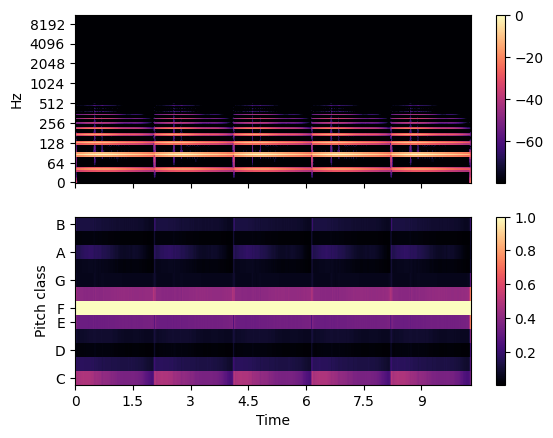

In [8]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

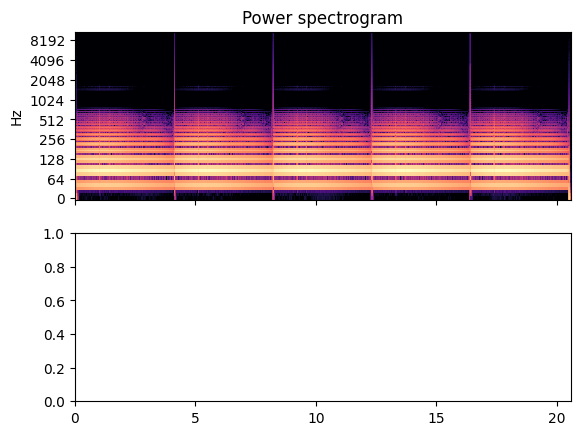

In [9]:
# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

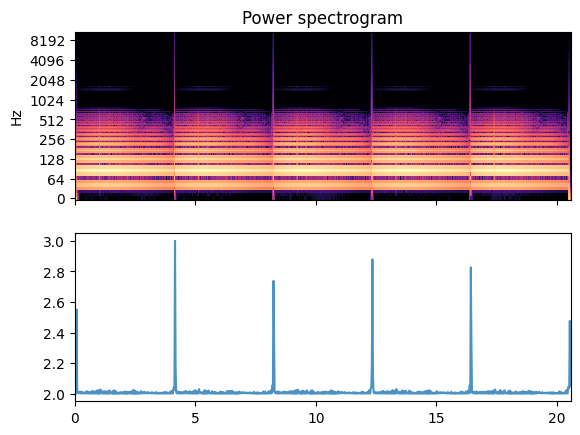

In [10]:
# Construct a standard onset function
# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
onset_env = librosa.onset.onset_strength(y=x, sr=sr)
ax[1].plot(times, 2 + onset_env / onset_env.max(), alpha=0.8,
           label='Mean (mel)')

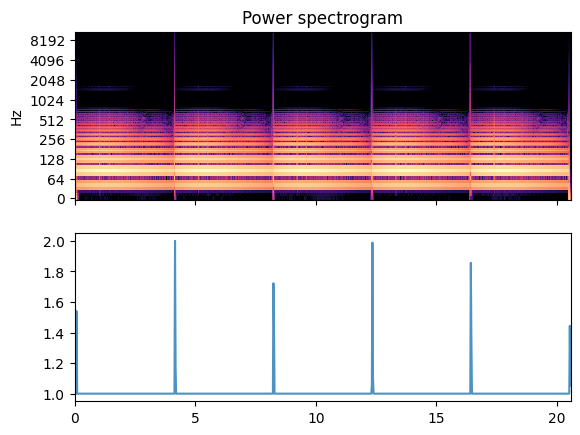

In [11]:
# Median aggregation, and custom mel options
# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

onset_env = librosa.onset.onset_strength(y=x, sr=sr,
                                         aggregate=np.median,
                                         fmax=8000, n_mels=256)
ax[1].plot(times, 1 + onset_env / onset_env.max(), alpha=0.8,
           label='Median (custom mel)')

[Text(0, 0.5, 'Normalized strength'), []]

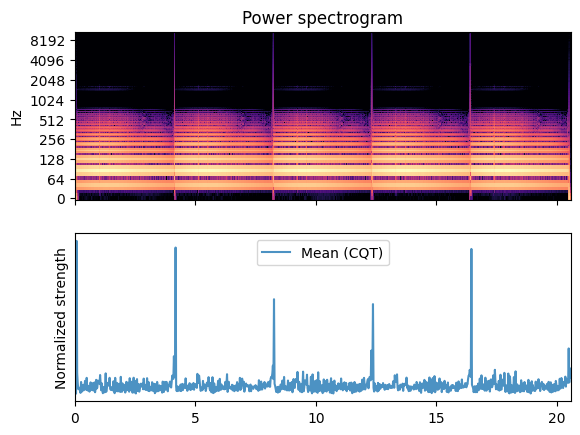

In [12]:
# Constant-Q spectrogram instead of Mel

# librosa.onset.onset_strength
# https://librosa.org/doc-playground/main/generated/librosa.onset.onset_strength.html?highlight=vibrations
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()


C = np.abs(librosa.cqt(y=x, sr=sr))
onset_env = librosa.onset.onset_strength(sr=sr, S=librosa.amplitude_to_db(C, ref=np.max))
ax[1].plot(times, onset_env / onset_env.max(), alpha=0.8,
         label='Mean (CQT)')
ax[1].legend()
ax[1].set(ylabel='Normalized strength', yticks=[])

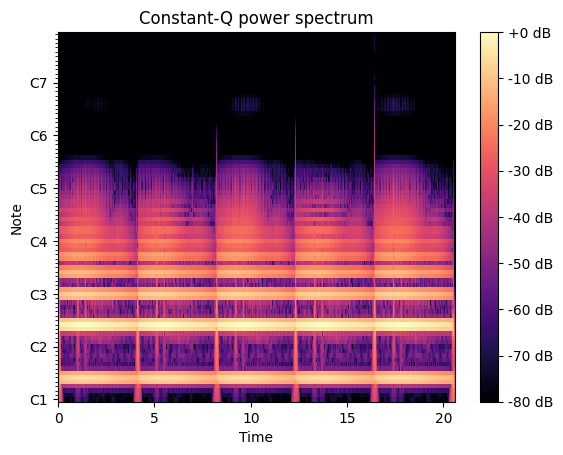

In [13]:
C = np.abs(librosa.cqt(x, sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

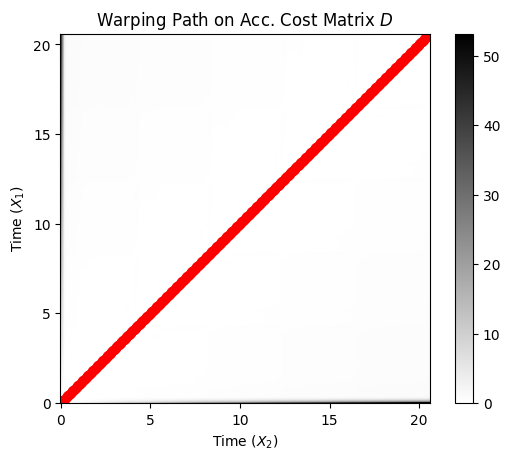

In [14]:
D, wp = librosa.sequence.dtw(X=x_chroma,Y=x_chroma, metric='cosine')
wp_s = librosa.frames_to_time(wp, sr=sr, hop_length=hop_length)

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='time', sr=sr,
                               cmap='gray_r', hop_length=hop_length, ax=ax)
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
ax.set(title='Warping Path on Acc. Cost Matrix $D$',
       xlabel='Time $(X_2)$', ylabel='Time $(X_1)$')
fig.colorbar(img, ax=ax)


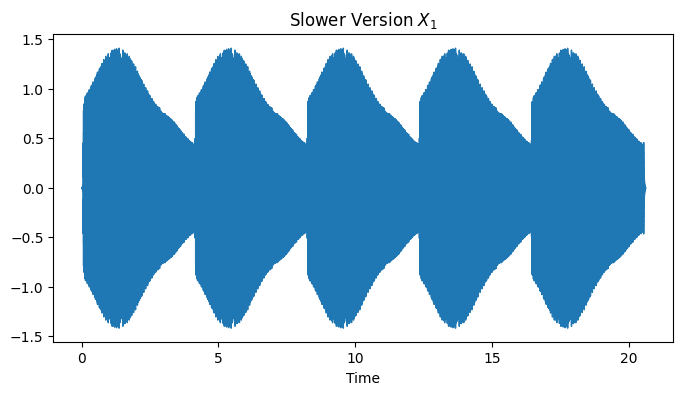

In [15]:
#Alternative Visualization in the Time Domain
fig, ax1 = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(8, 4))

# Plot x_1
librosa.display.waveshow(x, sr=sr, ax=ax1)
ax1.set(title='Slower Version $X_1$')
ax1.label_outer()


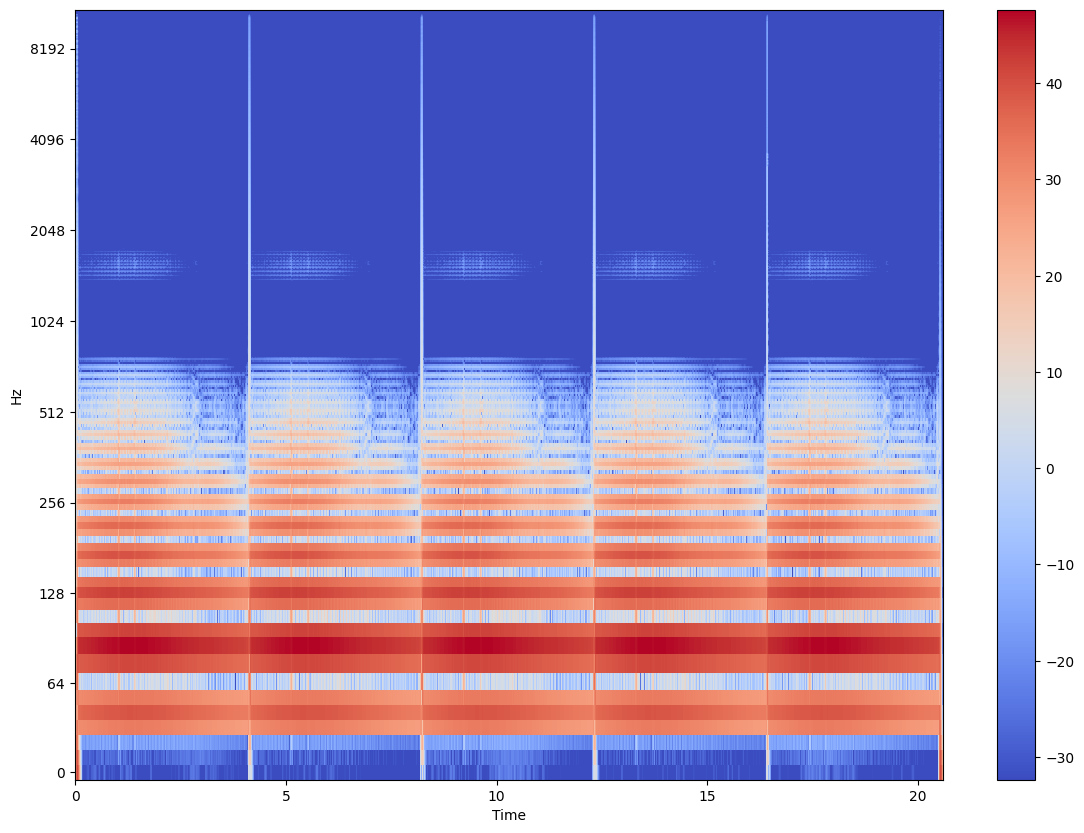

In [16]:
# Spectrogram
import matplotlib.pyplot as plt
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 10))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [17]:
X

array([[-6.20459938e+00+0.0000000e+00j, -6.55151596e+01+0.0000000e+00j,
        -1.09399300e+02+0.0000000e+00j, ...,
         1.10935181e+02+0.0000000e+00j,  7.81137924e+01+0.0000000e+00j,
         2.03146420e+01+0.0000000e+00j],
       [-4.64952660e+00-4.0573130e+00j,  2.58454247e+01-5.4803360e+01j,
         8.62727585e+01+1.0571259e+01j, ...,
        -9.29501495e+01+1.1938703e+01j, -2.93133278e+01-4.4645023e+01j,
        -4.86949492e+00-1.2167308e+01j],
       [-7.39324868e-01-5.9643183e+00j,  2.84439964e+01+3.8711567e+01j,
        -3.93445511e+01-3.1390179e+01j, ...,
         6.56157074e+01-9.5853430e-01j, -1.92258072e+01+1.1084711e+01j,
        -3.48910356e+00+2.8890458e-01j],
       ...,
       [ 1.06356117e-06+2.5319864e-07j, -1.88507397e-06+1.1112594e-06j,
         5.36291452e-07-1.1980326e-06j, ...,
         4.07583684e-07-5.2715978e-07j,  2.58795853e-06-1.8060643e-06j,
        -5.86773822e-05+5.0043232e-05j],
       [-1.40728559e-07+4.4004688e-07j,  5.26882729e-07-7.3851299e-0

In [18]:
Xdb

array([[ 15.854275,  36.326836,  40.780293, ...,  40.901382,  37.854553,
         26.156185],
       [ 15.806956,  35.64831 ,  38.782196, ...,  39.436066,  34.552177,
         22.349102],
       [ 15.57744 ,  33.63169 ,  34.03693 , ...,  36.341084,  26.924084,
         10.883952],
       ...,
       [-32.36309 , -32.36309 , -32.36309 , ..., -32.36309 , -32.36309 ,
        -32.36309 ],
       [-32.36309 , -32.36309 , -32.36309 , ..., -32.36309 , -32.36309 ,
        -32.36309 ],
       [-32.36309 , -32.36309 , -32.36309 , ..., -32.36309 , -32.36309 ,
        -32.36309 ]], dtype=float32)

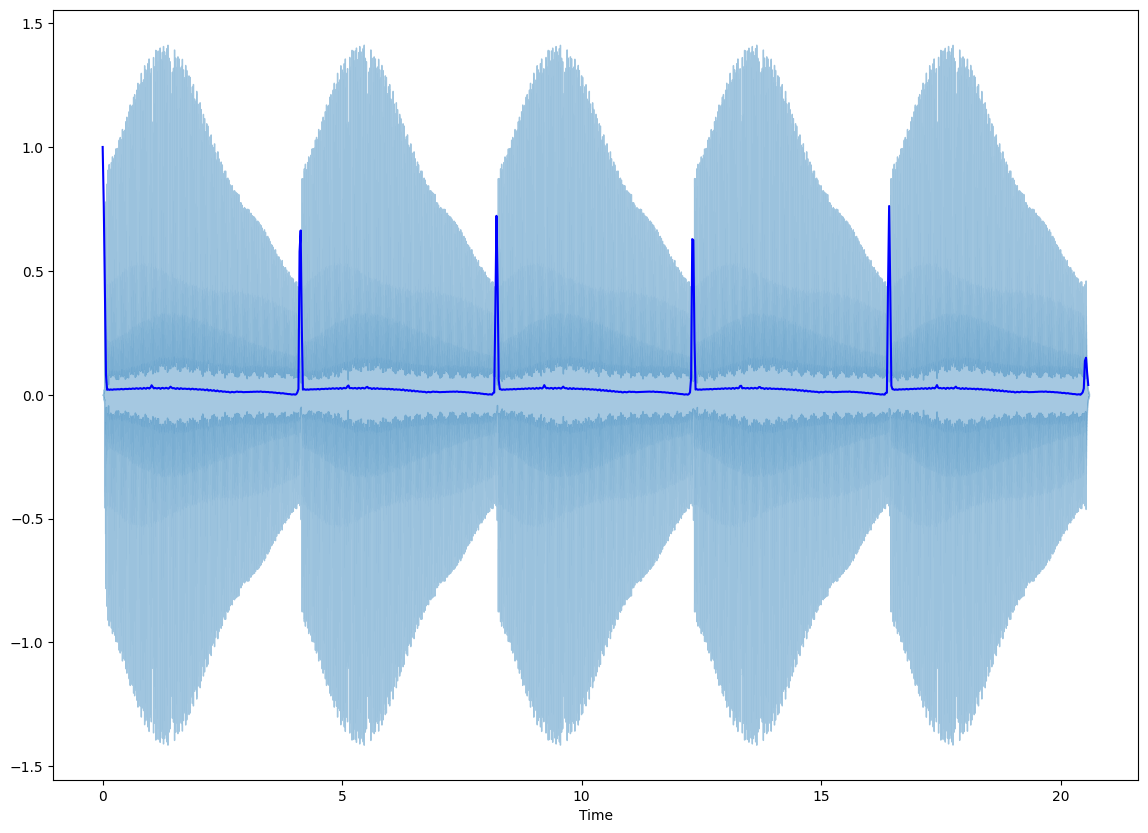

In [19]:
# Spectral Centroid
import sklearn
from sklearn import preprocessing
#https://zhuanlan.zhihu.com/p/144922679
#labelEncoder= preprocessing.LabelEncoder()

spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape
plt.figure(figsize=(14, 10))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

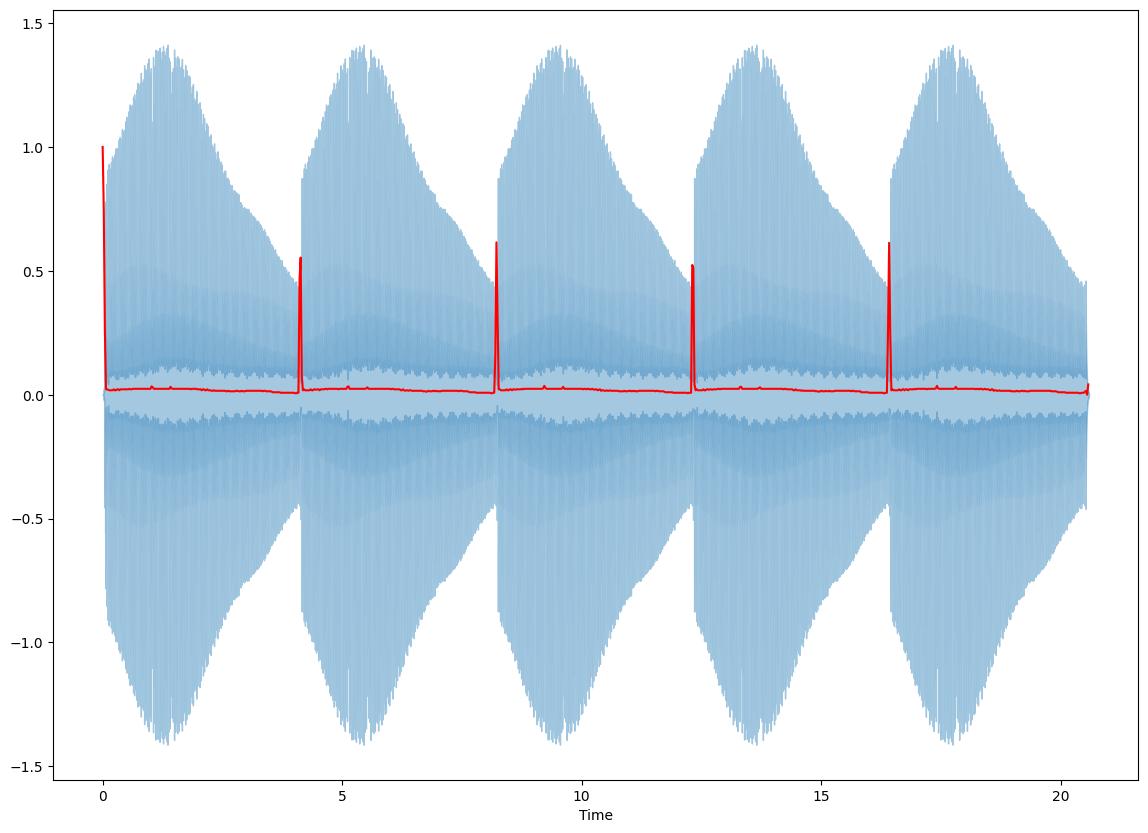

In [20]:
# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(14, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

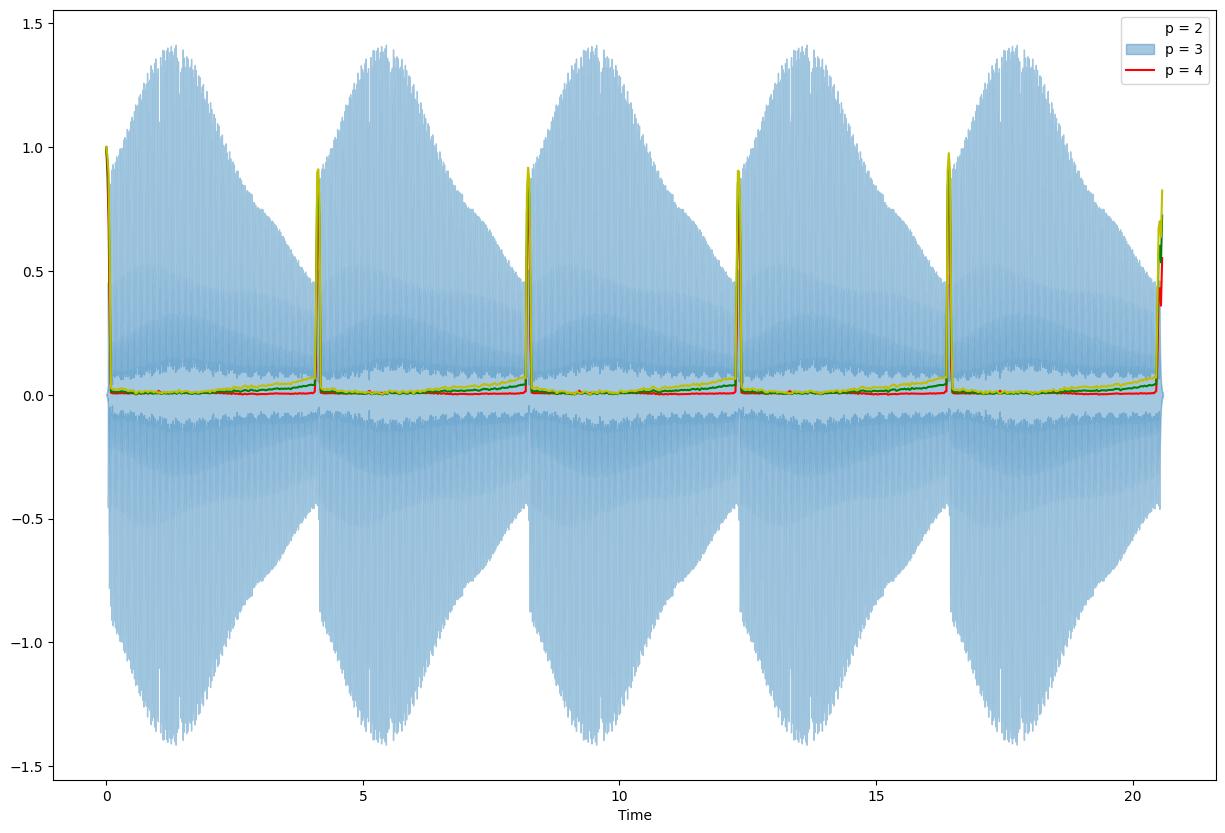

In [21]:
# Spectral Bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

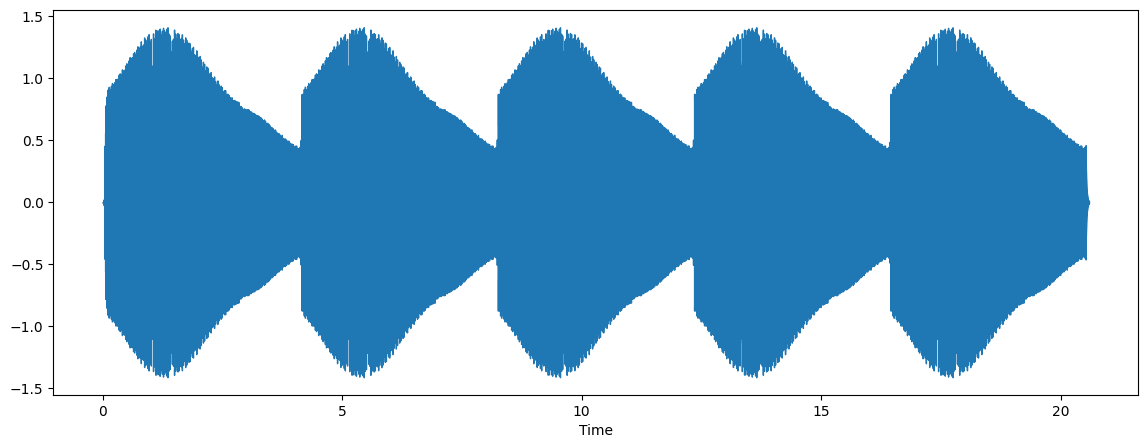

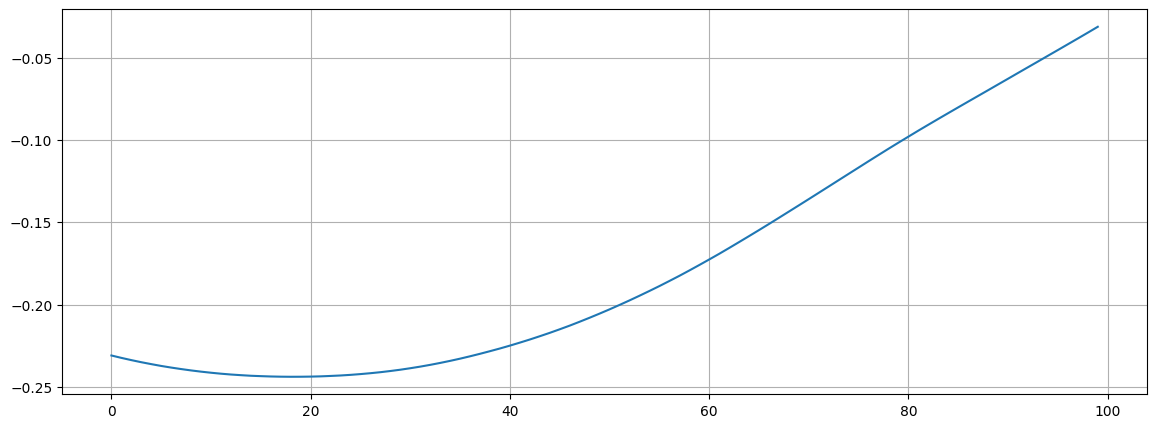

In [22]:
# Zero-Crossing Rate
x, sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [23]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

0


(20, 887)


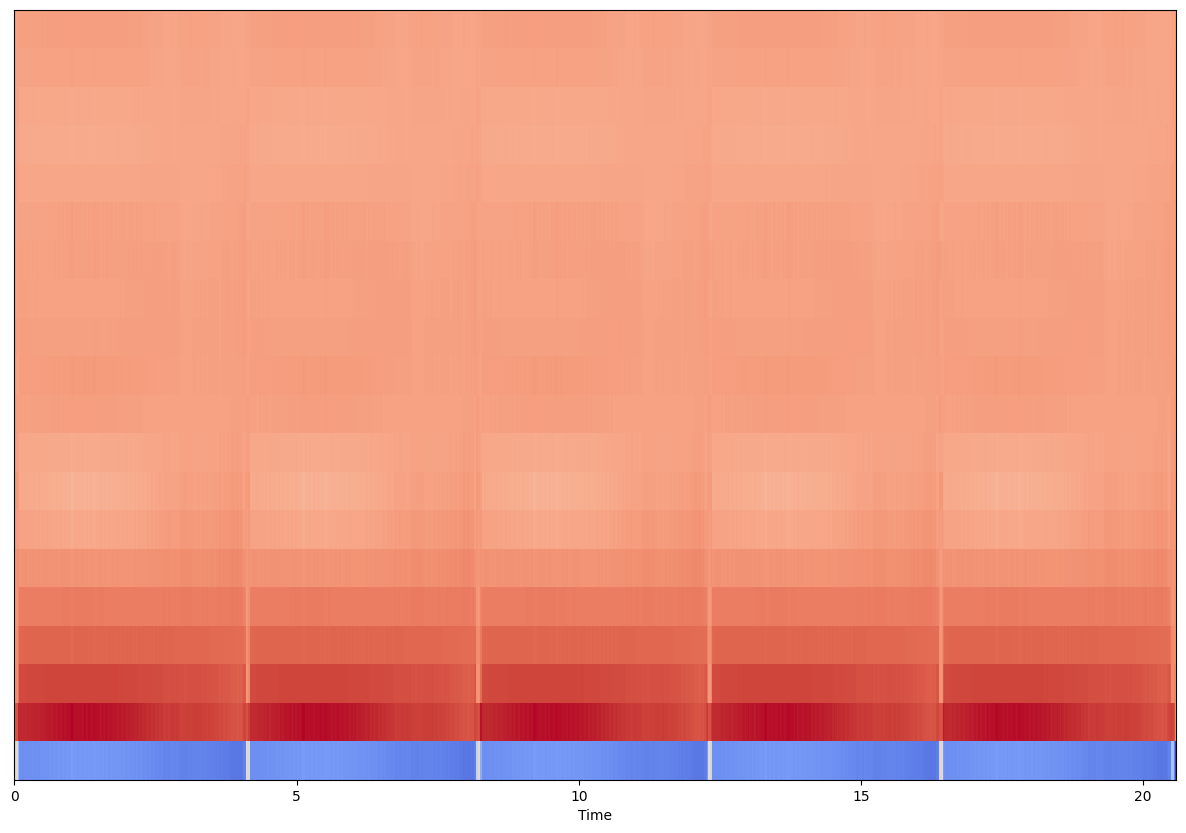

In [24]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')